In [4]:
%matplotlib inline
import numpy as np
import mglearn
import matplotlib.pyplot as plt

c:\ipynot~1\intro-ml\venv\lib\site-packages\sklearn\externals\six.py:31: DeprecationWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", DeprecationWarning)
c:\ipynot~1\intro-ml\venv\lib\site-packages\sklearn\externals\joblib\__init__.py:15: DeprecationWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=DeprecationWarning)


### Naive Bayes Classifiers

Similar to the linear models discussed above.
* Tend to be faster in training → causes slightly worse generalization performance than the linear classifiers
* Efficient because they look at each feature individually to get per-class statistics for each feature

`scikit-learn` has 3 kinds:
* `GaussianNB` → applied to continuous data
* `BernoulliNB` → applied to binary data
* `MultinomialNB` → applied to count data (i.e. each feature assumes an integer count of something, like words in a sentence)

`BernoulliNB` and `MultinomialNB` are typically used in test data classification. `BernoulliNB` works by counting how often every feature of a class is non-zero.

In [2]:
X = np.array([[0, 1, 0, 1],
              [1, 0, 1, 1],
              [0, 0, 0, 1],
              [1, 0, 1, 0]])
y = np.array([0, 1, 0, 1])

counts = {}
for label in np.unique(y):
    # print('label:', label)
    # print('X[y == label]:', X[y == label])
    # print('X[y == label].sum(axis=0):', X[y == label].sum(axis=0))
    # iterate over each class
    # count (sum) entries of 1 per feature
    counts[label] = X[y == label].sum(axis=0)
print("Feature counts:\n{}".format(counts))

Feature counts:
{0: array([0, 1, 0, 2]), 1: array([2, 0, 2, 1])}


In our example above we have 4 data points with 4 binary features each.  There are two classes, 0 (points 1 and 3) and 1 (points 2 and 4).  The method then counts the number of non-zero entries for a given feature. `MultinomialNB` is similar but takes into account thr average value of each feature.  `GaussianNB` also takes into account the average avlue as well as the standard deviation. Predictions are made by comparing a new data point to all the statistics and then choosing the one it most closely matches.  The prediction formula is the same  as that in the linear models but the `coef_` from these are different from $w$ in the linear models.

##### Stengths, weaknesses, parameters

* `MultinomialNB` and `BernoulliNB` take a single param, `alpha`, which controls complexity
    * This works by adding `alpha` number of virtual points with positive values for all features causing "smoothing" of the stats
    * Larger `alpha` means simpler model and more smoothing
    * `alpha` is not critical to performance
    
* `GaussianNB` mostly used on high-dimensional data, others used for sparse count data.
* `MultinomialNB` usually performs better than `BernoulliNB` for their applications, particularly when data has large number of nonzero features (e.g. large documents)

* Share many of the strengths and weaknesses of linear models
    * fast to train/predict
    * good for high dimensions
* Serve as good baselines, especially when training a linear model would even take too long

#### Decision Trees

Widely used for classification and regression.  They are essntially a learned heirarchy of if/else questions ultimately leading to an decision.  You can think of it almost like playing 20 questions.

![Decision Tree Example](img/decisiontree.png "Decision Tree")

In the tree every node is representative of a question or terminal node (aka a __leaf__).  Edges connect aswers to a new question.  When a machine learns a decision tree it is finding the tree that gets to the answer the fastest.  The questions the machine asks are called __tests__.  Data often isn't binary so for continuous data the tests are in the form “Is feature _i_ larger than value _a_?” To build the algorithm every test is tried and the one that gives the best information back is chosen.  This process can then be repeated to make the tree deeper.  A leaf of a tree that contains data points that all share the same target is called __pure__.

![Depth 1](img/depth1.png "Decision Tree")
![Depth 2](img/depth2.png "Decision Tree")
![Depth 9](img/depth9.png "Decision Tree")

When a new point is added, it is classified by what partition it lands in.  Trees can be used for regression as well by using the same process.  The output for a new data point in the regression will be the mean target of the leaf's trainging points.

_**Controlling complexity**_

Trees that have all pure leaves are usually over complex and highly overfit to the training data.  Two ways to prevent this are:
* __Pre-pruning__, or stopping the creation of the tree early
* __Post-pruning__, or building the entire tree and then removing or collapsing nodes with little info.

Pre-pruning can be done by limiting the maximum depth, number of leaves, or requiring nodes to contion a minimum number of points before splitting again.  The `DecisionTreeRegressor` and `DecisionTreeClassifier` in `scikit-learn` use pre-pruning.

In [7]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split

cancer = load_breast_cancer()
X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, stratify=cancer.target, random_state=42)
tree = DecisionTreeClassifier(random_state=0)
tree.fit(X_train, y_train)

print("Accuracy on training set: {:.3f}".format(tree.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}\n".format(tree.score(X_test, y_test)))

tree = DecisionTreeClassifier(max_depth=4, random_state=0)
tree.fit(X_train, y_train)

print("Accuracy on training set: {:.3f}".format(tree.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(tree.score(X_test, y_test)))

Accuracy on training set: 1.000
Accuracy on test set: 0.937

Accuracy on training set: 0.988
Accuracy on test set: 0.951


As we can see by adding some constraints and making the model simpler the generalization of the model was improved.  Here's the tree visualized:

![The graph the decision tree created](img/cancer_decisiontree.png "Decision Tree")

Instead of looking at the whole tree we can often just look at some important summaries.  The most common thing to look at is __feature importance__ which rates how important each feature is on a scale of 0 (not used at all) to 1 (perfectly predict the target).  The importances always sum to 1.

Feature importances:
[0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.01019737 0.04839825
 0.         0.         0.0024156  0.         0.         0.
 0.         0.         0.72682851 0.0458159  0.         0.
 0.0141577  0.         0.018188   0.1221132  0.01188548 0.        ]


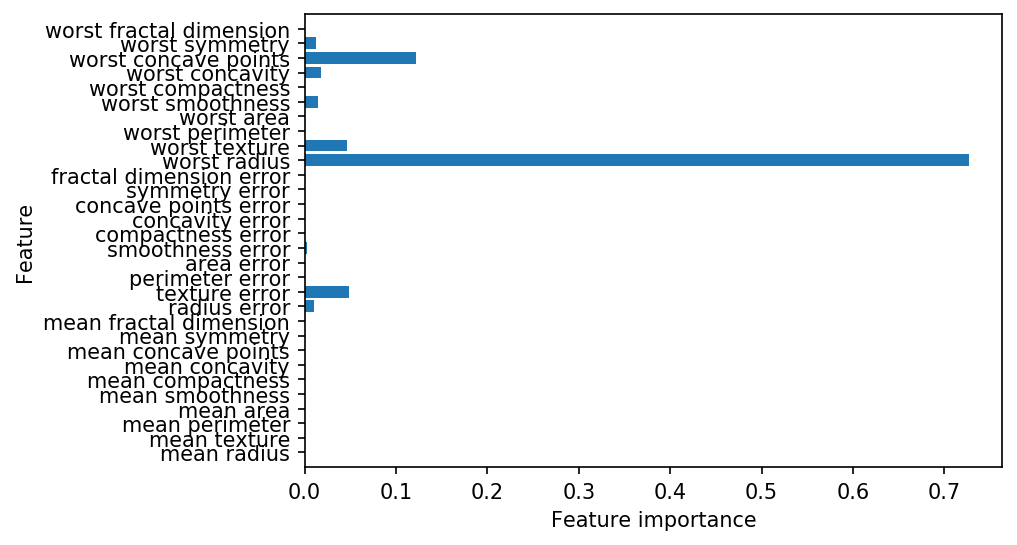

In [8]:
print("Feature importances:\n{}".format(tree.feature_importances_))

def plot_feature_importances_cancer(model):
    plt.figure(dpi=150)
    n_features = cancer.data.shape[1]
    plt.barh(range(n_features), model.feature_importances_, align='center')
    plt.yticks(np.arange(n_features), cancer.feature_names)
    plt.xlabel("Feature importance")
    plt.ylabel("Feature")
    plt.ylim(-1, n_features)
plot_feature_importances_cancer(tree)

We can see the most important feature is "worst radius" which was used as the top split and is generally predictive of the outcome, however it wasn't one so we need to still depend on some other features as well.  The feature being important doesn't tell us the class through.  Sometimes there isn't even a simple relationship between features and class.

Feature importances: [0. 1.]


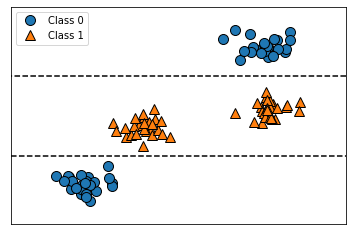

In [9]:
tree = mglearn.plots.plot_tree_not_monotone()

![The associated decision tree](img/nonmonotonous.png "Decision Tree")

In this example all the info used is in the second feature, but the relationship between the feature and the class is not monotonous (i.e. a high value of the feature means class 0, and a low value means class 1 isn't true).

The `DecisionTreeRegressor` is very similar in usage and analysis to the classifier.  One key note about the regressor though is that it cannot extrapolate outside the range of the trainging data.

Text(0, 0.5, 'Price in $/Mbyte')

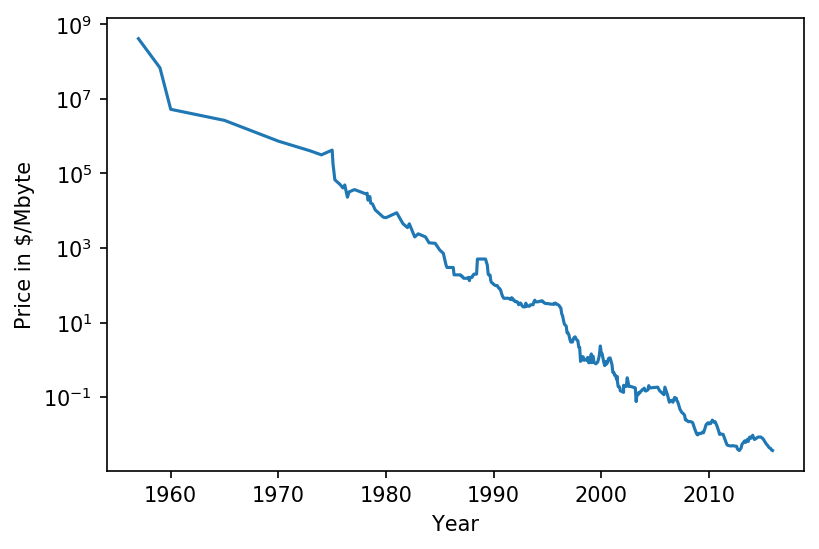

In [10]:
import os
import pandas as pd

ram_prices = pd.read_csv(os.path.join(mglearn.datasets.DATA_PATH, "ram_price.csv"))
plt.figure(dpi=150)
plt.semilogy(ram_prices.date, ram_prices.price)
plt.xlabel("Year")
plt.ylabel("Price in $/Mbyte")

note the log scale to make the relation more linear and easier to predict.  We will try to predict after the year 2000 and train on the preceding years.

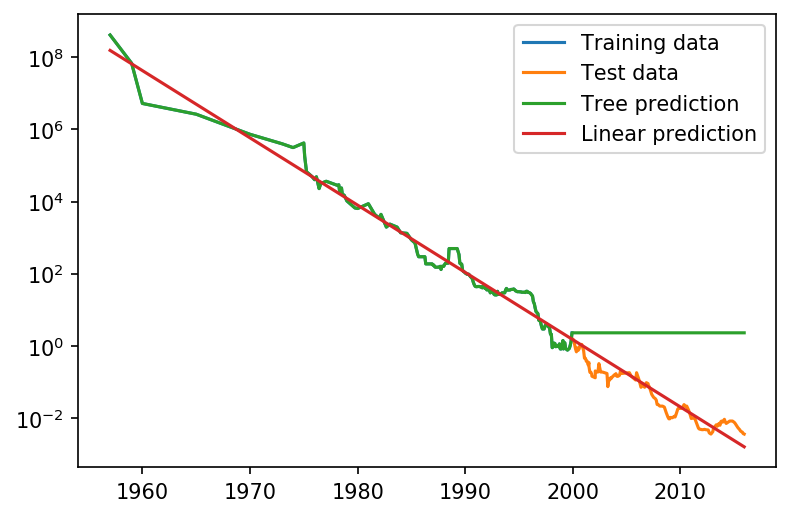

In [12]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression

# use historical data to forecast prices after the year 2000
data_train = ram_prices[ram_prices.date < 2000]
data_test = ram_prices[ram_prices.date >= 2000]

# predict prices based on date
X_train = data_train.date[:, np.newaxis]
# we use a log-transform to get a simpler relationship of data to target
y_train = np.log(data_train.price)

tree = DecisionTreeRegressor().fit(X_train, y_train)
linear_reg = LinearRegression().fit(X_train, y_train)

# predict on all data
X_all = ram_prices.date[:, np.newaxis]
pred_tree = tree.predict(X_all)
pred_lr = linear_reg.predict(X_all)

# undo log-transform
price_tree = np.exp(pred_tree)
price_lr = np.exp(pred_lr)

plt.figure(dpi=150)
plt.semilogy(data_train.date, data_train.price, label="Training data")
plt.semilogy(data_test.date, data_test.price, label="Test data")
plt.semilogy(ram_prices.date, price_tree, label="Tree prediction")
plt.semilogy(ram_prices.date, price_lr, label="Linear prediction")
plt.legend()

The difference is quite apparent.  The decision tree was able to perfectly match on all the training data but outside those ranges the model completly breaks down.  On the otherhand the linear regression isn't a perfect fit but it is able to extrapolate much better than the decision tree.  This shortcoming applies to all models based on trees.

##### Stengths, weaknesses, parameters

The most important paramters are the ones that control pre-pruning. Setting one of `max_depth`, `max_leaf_nodes`, or `min_samples_leaf` tends to be sufficient for preventing overfitting.

Pros:
* The model is easily understood by nonexperts
* Can be visualized very easily
* no preprocessing like normalization or standardization of features
* Work well when features are on completely different scales or a mix of binary and continuous features

Cons:
* Even with constraints they tend to overfit